In [26]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

c:\users\knock\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  # This is added back by InteractiveShellApp.init_path()


In [4]:
#Create data
n = 2000

#generate data

data = torch.randint(low=-10, high=11, size=(n,2)).float()

#labels
labels = torch.sum(data,axis = 1, keepdim= True)

for i in range(n):
    print(data[i],labels[i])

tensor([-2., -4.]) tensor([-6.])
tensor([-5., -4.]) tensor([-9.])
tensor([7., 6.]) tensor([13.])
tensor([ 6., -1.]) tensor([5.])
tensor([5., 1.]) tensor([6.])
tensor([ 5., -7.]) tensor([-2.])
tensor([9., 9.]) tensor([18.])
tensor([-10.,  -3.]) tensor([-13.])
tensor([ 7., 10.]) tensor([17.])
tensor([-4.,  2.]) tensor([-2.])
tensor([-5.,  5.]) tensor([0.])
tensor([-4.,  4.]) tensor([0.])
tensor([-3.,  3.]) tensor([0.])
tensor([-8., -6.]) tensor([-14.])
tensor([-10.,   9.]) tensor([-1.])
tensor([-9., -9.]) tensor([-18.])
tensor([-5., -8.]) tensor([-13.])
tensor([10., -8.]) tensor([2.])
tensor([-3., 10.]) tensor([7.])
tensor([-4., -3.]) tensor([-7.])
tensor([-10.,  10.]) tensor([0.])
tensor([ 4., 10.]) tensor([14.])
tensor([ 3., -3.]) tensor([0.])
tensor([-10.,  -4.]) tensor([-14.])
tensor([ 6., -6.]) tensor([0.])
tensor([-4.,  2.]) tensor([-2.])
tensor([5., 5.]) tensor([10.])
tensor([8., 2.]) tensor([10.])
tensor([-1., -5.]) tensor([-6.])
tensor([7., 2.]) tensor([9.])
tensor([3., 1.]) ten

### Designing the model

In [17]:
# a function that build the model

def create_model():

    #model architecture
    adder_model = nn.Sequential(
        nn.Linear(2,30),        #input layer
        nn.ReLU(),              #activation function
        nn.Linear(30,1)         #outut layer
    )

    # loss function
    loss_fun = nn.MSELoss()

    #optimization
    optimizer = torch.optim.Adam(adder_model.parameters(), lr = .01)

    #model output
    return adder_model, loss_fun, optimizer

### Train model

In [20]:
# A function to train the model
num_epochs = 100

def train_model(create_model):

    #initialize the losses
    losses = torch.zeros(num_epochs)

    #loop over epochs
    for epochi in range(num_epochs):

        num_loss = []

        #loop through "minibatch" of n=1:
        for num,ans in zip(data,labels):

            #forward pass
            y_hat = create_model(num)

            #compute loss
            loss = loss_fun(y_hat,ans)
            num_loss.append(loss.item())

            #backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses[epochi]  = np.mean(num_loss)

        #final forward pass
        with torch.no_grad():
            predictions = add_model(data)

        #computer the predictions and report accuracy
        train_acc = 100*torch.mean( (np.abs(predictions-labels)<1).float() )

        ### test with new data
        #create brand new test data
        test_data = torch.randint(low=-10, high=11, size=(n,2)).float()
        tet_labels = torch.sum(test_data, axis=1, keepdim=True)

        #evaluate the model in the test data
        with torch.no_grad():
            predictions = add_model(test_data)
        test_acc = 100*torch.mean( (np.abs(predictions-tet_labels)<1).float() )

        # EOF
        return losses,train_acc,test_acc,add_model

In [21]:
#test the model once to make sure it works( sanity test)

add_model, loss_fun, optimizer = create_model()
losses, train_acc, test_acc, add_model = train_model(add_model)

test_acc,train_acc

(tensor(100.), tensor(100.))

In [22]:
losses

tensor([0.8644, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

## experiment ot chech model stability

In [24]:
for i in range(10):

    #create a new "machine" and train it
    add_model, loss_fun, optimizer = create_model()
    _,train_acc,test_acc,add_model = train_model(add_model)

    print("Model instance %s, final Train/Test accuracies: %g%%, %g%%" %(i+1, train_acc, test_acc))

Model instance 1, final Train/Test accuracies: 50.55%, 50.85%
Model instance 2, final Train/Test accuracies: 86.2%, 86.6%
Model instance 3, final Train/Test accuracies: 100%, 100%
Model instance 4, final Train/Test accuracies: 91.3%, 90.75%
Model instance 5, final Train/Test accuracies: 86.85%, 87.1%
Model instance 6, final Train/Test accuracies: 100%, 100%
Model instance 7, final Train/Test accuracies: 100%, 100%
Model instance 8, final Train/Test accuracies: 97.6%, 97.7%
Model instance 9, final Train/Test accuracies: 100%, 100%
Model instance 10, final Train/Test accuracies: 100%, 100%


### Looks good for some runs!!

In [25]:
# some plots from the final model

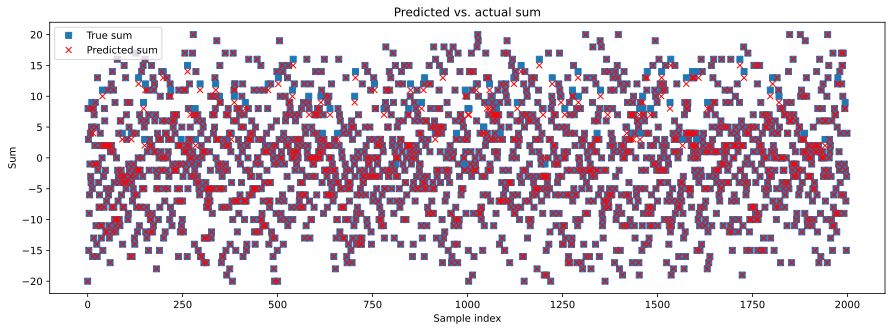

In [29]:
data = torch.randint(low=-10,high=11,size=(n,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
    predictions = add_model(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()

### Thank you